# CorrelAid machine-learning spring school 
## Section 5: Data Exploration 

Session will take place on **Tuesday, 29.03.2022, 18h CEST**.

Author: Sebastian Zezulka
### **to be distributed on Thursday, 24.03.2022**

During the next weeks, you will analyse the "Forest Cover Type Dataset" from [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/covertype). In this section, you will learn how to set up a (primary) data exploration and to prepare your data for further (machine learning) analyses.
Doning this, you will also take a close look at the practical problem and the data. For data extrapolation, you will have to estimate descriptive statistics and build some visualisations of the data. Further, you will have to write a function to get a balanced dataset and build a training-test-split.

### 0. Set up

In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set_context(font_scale=2)

### 1. Load Data
**Task:** Download the CSV data from the given URL/repo and inspect a few rows from it. What size has the dataset?

In [2]:
print(os.getcwd())
  
# to change the working directory use
#os.chdir()

C:\Users\Sebastian\Documents\10_CorrelAid\02_Projekte\02_ml_winter_school\notebooks


In [3]:
# Read in csv data

# INSERT YOUR CODE HERE
path_name = 'data/covtype.csv'
forest_data = pd.read_csv(path_name)

# Inspect first few rows of the data

# INSERT YOUR CODE HERE
forest_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## 2. Exploratory Analysis 

**Task:** Let's take a first look at the data we are going to analyse in the next weeks. Please make some notes for the workshop. We will predict the type of cover of a forest based on several features (variables) available. What, then, is the dependent variable in our data given the task? What was the original purpose to collect the data at hand? Do you have an intuition which features might be especially important and why?

**Answer:** 

**### delete before distribution ###**
'Cover_Type' is the dependent variable in our setting. 7 Categories are recorded: 
1 -- Spruce/Fir
2 -- Lodgepole Pine
3 -- Ponderosa Pine
4 -- Cottonwood/Willow
5 -- Aspen
6 -- Douglas-fir
7 -- Krummholz.
Data was collected to predict information on neighbouring lands of natural resource managers responsible for developing ecosystem management strategies. The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado.

**Task:** Does the dataset contain missing values? Check how many categories are in 'Type of Cover'. How many observations do we have per category? Plot the number of observations per category. What do you see?

In [94]:
# check for missing values

# INSERT YOUR CODE HERE
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [95]:
# number of observations per cover type category 

# INSERT YOUR CODE HERE
forest_data.groupby('Cover_Type').count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,...,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840
2,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,...,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301
3,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,...,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754
4,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,...,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
5,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493,...,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493
6,17367,17367,17367,17367,17367,17367,17367,17367,17367,17367,...,17367,17367,17367,17367,17367,17367,17367,17367,17367,17367
7,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510,...,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510


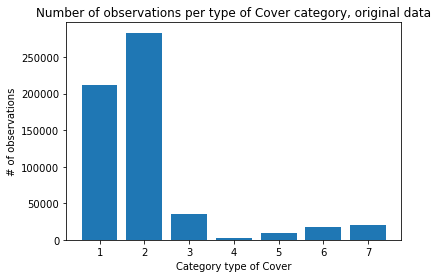

In [4]:
# bar plot of observations per cover type category 

# INSERT YOUR CODE HERE
list_soil_types = list(range(1,8))
num_obs = forest_data.groupby('Cover_Type').count().iloc[:,0]

plt.bar(list_soil_types, num_obs)
plt.xlabel('Category type of Cover')
plt.ylabel('# of observations')
plt.title('Number of observations per type of Cover category, original data')
plt.show();

**Answer:** 

**Task:** In the task above, we have seen that our data is unbalanced in the target variable `Type of Cover`. That is, there are different number of observations per category. This can be problematic for some machine learning algorithms, especially in classification, because much more information on classes 1 and 2 is available in training. This also can have implications for fairness concerns. In principle, we have three easy ways to deal with this problem: learn on the unbalanced data anyways; use *undersampling* by reducing the number of observations to the class with lowest observations; use *oversampling* by multiplying observations from categories with smaller number of observations or weight the loss function accordingly. You can get a more detailed overview [here](https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd)

Here, we will apply undersampling only. Your task is to write a function that produces a balanced dataset by randomly sampling from the respective classes. For this, use the provided random number generator. 

In [5]:
def undersampling(data, y_label: str, seed: int):
    '''
    Function that generates a balanced dataset from an unbalanced one
    input: 
        data : (N, D)-dataset
        y_label (string) : name of target variable
        seed (int) : seed for random number generator 
    
    output:
        data_balanced : dataset with balanced classes
    '''
    rng = np.random.default_rng(seed)
    
    # INSERT YOUR CODE HERE
    classes_y = sorted(data[y_label].unique())
    counts_y = data.groupby(y_label).count().iloc[:,0]
    
    data_balanced = []
    for i in classes_y:
        idx = rng.integers(low=0, high=counts_y[i], size=min(counts_y))
        data_i = pd.DataFrame(data[data[y_label] == i]).reset_index()
        data_i = data_i.loc[idx]
        data_balanced.append(data_i)
        
    data_balanced = pd.concat(data_balanced)
    
    return data_balanced

In [6]:
forest_data_balanced = undersampling(forest_data, 'Cover_Type', 1)

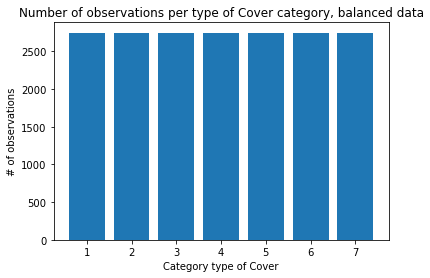

In [7]:
# test the undersampling function
list_soil_types = sorted(forest_data_balanced['Cover_Type'].unique())
num_obs = forest_data_balanced.groupby('Cover_Type').count().iloc[:,0]

plt.bar(list_soil_types, num_obs)
plt.xlabel('Category type of Cover')
plt.ylabel('# of observations')
plt.title('Number of observations per type of Cover category, balanced data')
plt.show();

**Task:** Two of our variables (`Wilderness_Area` and `Soil_Type`) are OneHot-encoded (also called dummy variables). That is, for every category we have one variable which indicates membership with a '1' and is '0' elsewhere. For the analysis, transform the variables of "Type Wilderness" and "Type Soil" into two categorical variables and drop the dummies. How many categories has each variable and what do they encode, respectivley?

In [8]:
# Display all variable names from dataset 
display(forest_data.columns)

# transform dummy variables into categorical ones and drop dummies

# INSERT YOUR CODE HERE
forest_data['Wilderness_Area_Type'] = (forest_data.iloc[:,10:14] == 1).idxmax(1)
forest_data['Soil_Type'] = (forest_data.iloc[:,14:55] == 1).idxmax(1)

# transform strings to numbers by, first, deleting text (use str.replace()) and, second, transforming variables to numeric
forest_data['Wilderness_Area_Type'] = forest_data['Wilderness_Area_Type'].str.replace('Wilderness_Area', '').astype('category')
forest_data['Soil_Type'] = forest_data['Soil_Type'].str.replace('Soil_Type', '').astype('category')

# drop dummy variables
forest_data.drop(['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'], axis=1, inplace=True)

# check result
display(forest_data.head())
display(forest_data.info())

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area_Type,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,5,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Elevation                           581012 non-null  int64   
 1   Aspect                              581012 non-null  int64   
 2   Slope                               581012 non-null  int64   
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64   
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64   
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64   
 6   Hillshade_9am                       581012 non-null  int64   
 7   Hillshade_Noon                      581012 non-null  int64   
 8   Hillshade_3pm                       581012 non-null  int64   
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64   
 10  Cover_Type                          581012 non-null  int64   
 11  Wilderness_Ar

None

**Task:** Reorder the features in 'forest_data' such that our feature variable `Cover_Type` is the last feature and also stored as Categorical data.

In [9]:
# INSERT YOUR CODE HERE

forest_data['Cover_Type'] = forest_data['Cover_Type'].astype('category')

cols_at_end = ['Cover_Type']
forest_data = forest_data[[c for c in forest_data.columns.values if c not in cols_at_end] 
        + [c for c in cols_at_end if c in forest_data.columns.values]]

display(forest_data.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_Type,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,29,5


**Task:** Now, let us take a closer look at the data and some descriptive statistics. Please answer the following questions: What is the `Cover Type` with the highest mean distance to the next fire point? What is the standard deviation of hillshades at noon? What is measured by the features `Elevation`, `Aspect`, and `Slope`? What is their respective scale?

In [10]:
# Baseline Descriptive Statistics
forest_data_describe = forest_data.describe()
display(forest_data_describe)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [11]:
# ordered distance to fire points by 'Cover Type' categories

# INSERT YOUR CODE HERE
forest_data.groupby('Cover_Type').mean()['Horizontal_Distance_To_Fire_Points'].sort_values(ascending = False)

Cover_Type
2    2168.154849
7    2070.031594
1    2009.253517
5    1577.719794
6    1055.351471
3     910.955949
4     859.124135
Name: Horizontal_Distance_To_Fire_Points, dtype: float64

In [12]:
# standard deviation of the feature 'Hillshade at Noon'

# INSERT YOUR CODE HERE
forest_data['Hillshade_Noon'].std()

19.768697153660785

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

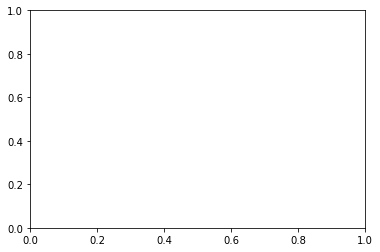

In [13]:
#list of wilderness areas

# INSERT YOUR CODE HERE
wilderness_areas = sorted(forest_data['Wilderness_Area_Type'].value_counts().index.tolist())

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = forest_data[forest_data['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)

**Answer:**
- Cover Type 2 has largest mean of horizontal distance to next fire point: 2168.15 meters 
- std of Hillshade_Noon: 19.768
- Elevation: meters 
- Aspect:  degrees azimuth (https://en.wikipedia.org/wiki/Azimuth)
- Slope: degrees 

**Task:** In this last part of Section 2, we will look at some visualisations of the features. First, we will consider correlations between variables. 
Create a visual representation of the correlation matrix of the features. Do you find any patterns?

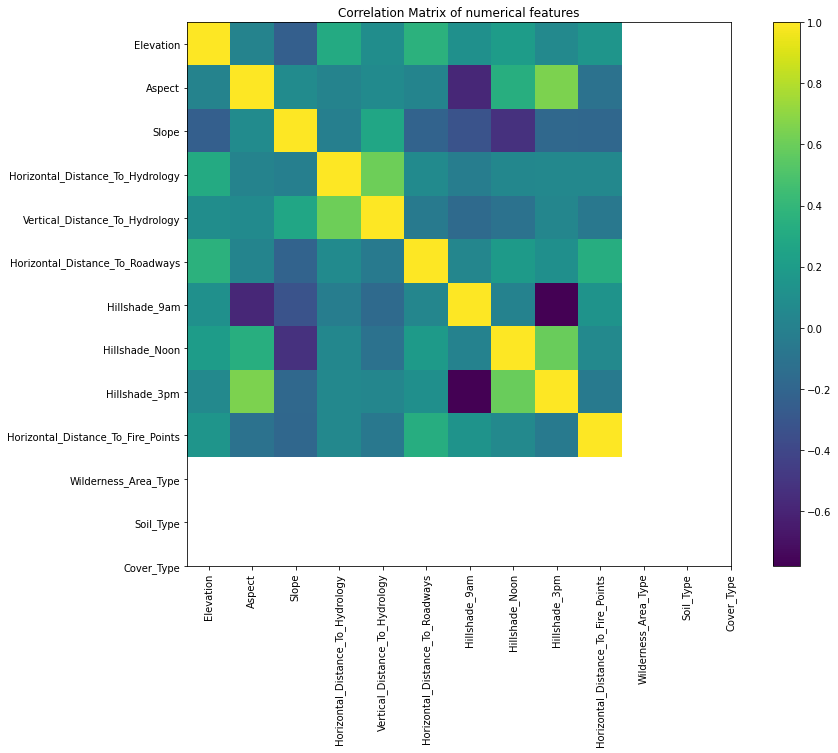

In [14]:
# Correlation Matrix of Features

# INSERT YOUR CODE HERE
labels = forest_data.columns
x_ = range(len(labels))

cor = forest_data[labels].corr()

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
im = plt.imshow(cor)
plt.xticks(ticks=x_, labels=labels, rotation=90)
plt.yticks(ticks=x_, labels=labels, rotation=0)
fig.colorbar(im, ax=ax)
plt.title('Correlation Matrix of numerical features')
plt.show();

**Answer:** Correlations between Hillshades at different points in time.

**Task:** Second, we will look at scatter plots between pairs of features. You can use the 'PairGrid'-function from [seaborn](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) for this. On the diagonal, we plot the features historgram. As before, can you make out any patterns in the data?  

In [24]:
grid = sns.PairGrid(data = forest_data_balanced.iloc[:,:10], corner=True)

# INSERT YOUR CODE HERE

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'green', edgecolor = 'white')

# Bottom is scatter plot
grid.map_lower(sns.scatterplot, color = 'green', alpha = 0.1)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001785B03F8B0> (for post_execute):


KeyboardInterrupt: 

**Answer:** Something something one what one sees in these plots...

### 3. PCA and data-compression
This is a small exkurs! We won't discuss it (in detail) in the workshop, so feel free to skipp this part.

PCA - principal component analysis - is a simple (linear algebra) tool of unsupervised learning. In general, there are three motivations for using dimensionality reduction techniques: saving memory, finding "structure" in the data and finding differences between a known number of classes in the data. PCA can also be used as preprocessing step in a machine learning pipline. The core idea of PCA is to find a lower dimensional representation of the data such that the mean squared reconstruction error is minimised. One can show that this is achieved for projecting the (centered) data on the first m eigenvectors of the covariance (or correlation) matrix. Note that scaling of data changes the results. Also, it is hard (to impossible) to interpret results when features have not the same unit! 

You can find an intuitive explanation of PCA [here](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues). The same author, Dmitry Kobak, has an hour long introduction to PCA online [here](https://www.youtube.com/watch?v=xBf_LZ5ZgY4). Overall, his series of ten talks is a fantastic introduction to machine learning!

**Task:** Write a function that performs PCA on input data. For this, estimate the covariance matrix of the data and estimate its eigenvalues. Sort them in decreasing order and sort the corresponding eigenvectors accordingly. The eigenvalues dividided by the total variance give the fraction of variance "explained" by one principle component. Multiplying the eigenvectors with the data results in the principal components. 

In [36]:
def PCA(data):
    '''
    Function that performs PCA on the input data
    
    input: (N, D)-shaped data
    output:
        fraction_variance_explained: (D,)-shaped array with the fraction of variance explained by the individual PCs
        principal_components: (D, D)-shaped array containing the principal components as columns
    '''
    # INSERT YOUR CODE HERE
    
    # covariate matrix of transposed data
    C = np.cov(data.T)
    # eigenvalues and -vectors of cov-matrix
    eigen_values, eigen_vectors = np.linalg.eigh(C)
    
    # sort eigenvalues and eigenvectors 
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]

    # total variance is trace of C
    tot_var = np.trace(C)
    # Explained Variance by PC i 
    fraction_variance_explained = np.divide(eigen_values, tot_var)
    
    # principal components
    principal_components = eigen_vectors
        
    return fraction_variance_explained, principal_components

In [37]:
# select only numerical features for PCA
pca_forest_data_balanced = forest_data_balanced.iloc[:,:10]

frac_var_exp, PC_forest_data = PCA(pca_forest_data_balanced)

**Task:** we first want to know how much variance the first principle components explain. Plot the variance explained of the `n`-th PC vs. `n` and plot the cumulative variance explained for the `n` PCs with highest variance explained vs. `n`. 
From the latter plot you should be able to see how much PCs you need to keep to explain at least `x`% of the variance.

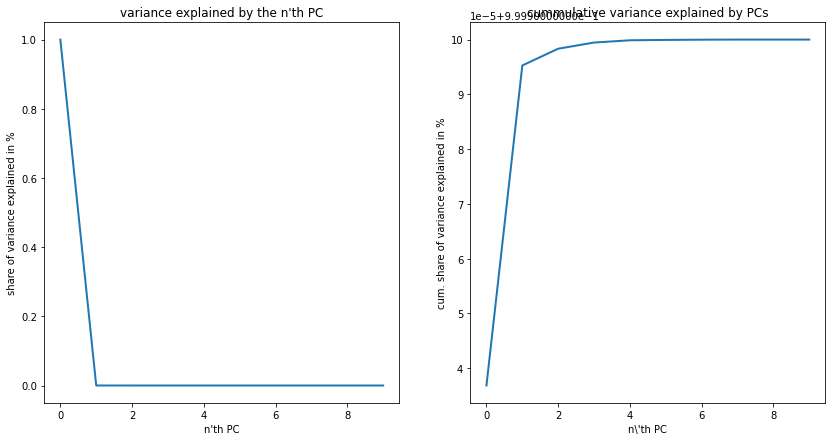

In [38]:
plt.figure(figsize=(14,7))

plt.subplot(121)
# INSERT YOUR CODE HERE
plt.plot( range(len(frac_var_exp)), frac_var_exp, lw=2)

plt.title('variance explained by the n\'th PC')
plt.ylabel('share of variance explained in %')
plt.xlabel('n\'th PC')

plt.subplot(122)
# INSERT YOUR CODE HERE
plt.plot(range(len(frac_var_exp)), np.cumsum(frac_var_exp), lw=2)

plt.title('cummulative variance explained by PCs')
plt.ylabel('cum. share of variance explained in %')
plt.xlabel(r'n\'th PC')

plt.show()

**Task:** We now can also plot the first three PC scores, that is the data multiplied with the first `n` PCs against each other. Further, by colouring the datapoints by `Cover_Type` categories, we can see whether the first few principle components can separete the classes.

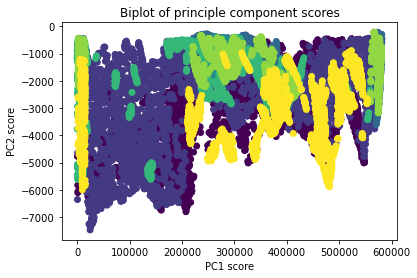

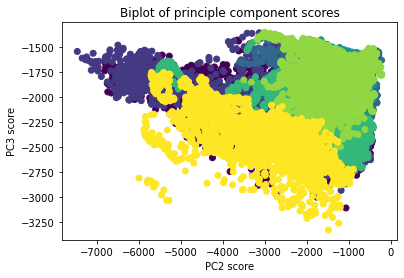

In [39]:
# PCA scores of forest_data: multiply the data with the three eigenvectors that belong to the two largest eigenvalues

# INSERT YOUR CODE HERE
pca_scores =  pca_forest_data_balanced @ PC_forest_data[:,:3]

plt.scatter(pca_scores.iloc[:,0], pca_scores.iloc[:,1], c=forest_data_balanced['Cover_Type'])
plt.xlabel('PC1 score')
plt.ylabel('PC2 score')
plt.title('Biplot of principle component scores')
plt.show();
plt.scatter(pca_scores.iloc[:,1], pca_scores.iloc[:,2], c=forest_data_balanced['Cover_Type'])
plt.xlabel('PC2 score')
plt.ylabel('PC3 score')
plt.title('Biplot of principle component scores')
plt.show()

**Task:** Lastly, implement the PCA algorithm using the sklearn package and compare the results. 

In [40]:
from sklearn.decomposition import PCA

In [45]:
# INSERT YOUR CODE HERE


### 4. Preprocessing 

In this final section, we prepare the data for further (machine learning) analyses. 

A core feature of machine learning is the usage of *strictily sparated* trainings and test data to check the generlisibility of a model. The background to this is so called bias-variance trade-off when minimising the empirical risk. The risk is, for a classification task, the difference between the true labels and our predictions, measured by some loss function. Given the features, labels and a loss function (all three are choices you have to make!), we aim at minimising this loss in expectation. Because this is to hard, we minimis the loss on average and over a restricted function class only. 
Intuitivley, you can say that the bias of a model is smaller for larger function classes but so is the variance of the found solutions. Bias then relates to underfitting, variance to overfitting. In machine learning, we are using an hold out test set to check for overfitting. That is, we are training our model on a fraction of the available data (depends on size of your data, say 80%) and testing the model on the yet unseen test data (here, 20%). Only the latter result is a reasonable approximation of the performance of your model! 

When you have panel data and you assume they are indepent and identically distributed (iid), it is important to shuffle your data before you make the split to ensure that the data collection process does not "encode" information in your datasets. Note the difference to time-series data, where iid assumption is violated.

**Task:** One-Hot Encoding of variables 
then split in X, y and test-training

In [48]:
# separate the target feature in an array `y` and drop it from the rest of the data `X`
y = forest_data_balanced['Cover_Type']
X = forest_data_balanced.drop(['Cover_Type'] , axis = 1)
labels = X.columns

# test and training set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
X_train.shape

(13460, 55)

In this last step, we standardise the continuous variables. That is, we both center them (subtract the mean) and divide by the standard deviation of the trainings data which yields standard deviations of one. Importantly, the test data is standardised by using the statistics of the training data. If we standardise the whole dataset before splitting, we risk "information leakage" into the test set. Categorical (dummy) variables are left out and are later added. 

**Task:**

In [49]:
X_cat_train = X_train.iloc[:, 10:54].values
X_num_train = X_train.iloc[:, 0:10].values

X_cat_test = X_test.iloc[:, 10:54].values
X_num_test = X_test.iloc[:, 0:10].values

scaler = StandardScaler()
scaler.fit(X_num_train)
X_num_train_trans = scaler.transform(X_num_train)
X_num_test_trans = scaler.transform(X_num_test)

X_train_trans = np.hstack((X_num_train_trans, X_cat_train))
X_test_trans = np.hstack((X_num_test_trans, X_cat_test))
X_train_trans.shape

(13460, 54)

In [50]:
forest_data_standardised = pd.DataFrame(np.vstack((X_train_trans, X_test_trans)), columns=labels)
forest_data_standardised.head()

ValueError: Shape of passed values is (19229, 54), indices imply (19229, 55)